In [ ]:
pip install tensorflow

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor
from keras.models import Sequential
from keras.layers import Dense, Dropout

In [73]:
df = pd.read_csv('btc_2015_2024.csv')

In [74]:
df.head(10)

,date,open,high,low,close,volume,rsi_7,rsi_14,cci_7,cci_14,sma_50,ema_50,sma_100,ema_100,macd,bollinger,TrueRange,atr_7,atr_14,next_day_close
0,2015-01-02,314.079010,315.838989,313.565002,315.032013,7860650.0,100.000000,100.000000,-66.666667,-66.666667,314.640503,314.648333,314.640503,314.644418,0.017568,314.640503,2.273987,4.193073,4.275997,281.082001
1,2015-01-03,314.846008,315.149994,281.082001,281.082001,33054400.0,1.938583,2.096744,-100.000000,-100.000000,303.454336,303.009081,303.454336,303.232458,-1.030403,303.454336,34.067993,15.719617,14.951008,264.195007
2,2015-01-04,281.145996,287.230011,257.612000,264.195007,55629100.0,1.235506,1.375421,-110.693896,-110.693896,293.639503,292.715747,293.639503,293.178382,-2.091487,293.639503,29.618011,20.033779,19.034849,274.473999
3,2015-01-05,265.084015,278.341003,265.084015,274.473999,43962800.0,21.462825,19.523695,-76.487357,-76.487357,289.806403,288.769813,289.806403,289.286389,-2.215008,289.806403,14.145996,18.468441,17.907070,286.188995
4,2015-01-06,274.610992,287.553009,272.696014,286.188995,23245700.0,38.272356,34.350787,-37.070244,-37.070244,289.203501,288.295540,289.203501,288.744005,-1.746686,289.203501,14.856995,17.613461,17.300126,294.337006
5,2015-01-07,286.076996,298.753998,283.079010,294.337006,24866800.0,47.406514,42.311813,2.945655,2.945655,289.936859,289.265553,289.936859,289.591736,-1.047142,289.936859,15.674988,17.193931,17.013321,283.348999
6,2015-01-08,294.135010,294.135010,282.174988,283.348999,19982500.0,38.454009,35.975975,-3.927279,-21.763728,289.113377,288.418393,289.113377,288.755689,-1.083827,289.113377,12.162018,16.179535,16.238552,290.407990
7,2015-01-09,282.382996,291.114014,280.532990,290.407990,18718600.0,46.085088,41.986092,37.630321,-17.182022,289.257223,288.676444,289.257223,288.954304,-0.742517,289.257223,10.581024,15.113529,15.408315,274.795990
8,2015-01-10,287.303009,288.127014,273.966003,274.795990,15264300.0,34.914916,34.314027,-24.387207,-58.930944,287.811099,287.025532,287.811099,287.407686,-1.293763,287.811099,16.441987,15.354997,15.549380,265.660004
9,2015-01-11,274.608002,279.638000,265.039001,265.660004,18200800.0,29.957565,30.770594,-117.088939,-97.780486,285.797363,284.671991,285.797363,285.227052,-2.160682,285.797363,14.598999,15.222729,15.427602,267.795990


In [75]:
df.tail(10)

,date,open,high,low,close,volume,rsi_7,rsi_14,cci_7,cci_14,sma_50,ema_50,sma_100,ema_100,macd,bollinger,TrueRange,atr_7,atr_14,next_day_close
3345,2024-02-29,62499.183594,63585.644531,60498.730469,61198.382813,6.549661e+10,82.444436,80.651953,112.845315,206.401046,46578.032891,48440.768516,44342.163867,44510.887771,3421.157344,52601.613086,3086.914062,2675.298535,2124.654647,62440.632813
3346,2024-03-01,61168.062500,63155.101563,60802.527344,62440.632813,4.018637e+10,84.383498,82.051072,85.572355,151.130342,46899.473828,48989.782802,44592.246797,44865.932227,3758.938895,53335.080860,2352.574219,2629.195061,2140.934617,62029.847656
3347,2024-03-02,62431.652344,62458.699219,61657.289063,62029.847656,2.388847e+10,80.934728,79.991154,63.491506,115.870362,47283.007422,49501.157895,44839.649063,45205.811741,3947.976464,54021.877344,801.410156,2368.082932,2045.254298,63167.371094
3348,2024-03-03,62031.578125,63230.210938,61435.023438,63167.371094,2.625381e+10,83.158453,81.384834,62.751883,101.676750,47689.507188,50037.087824,45094.119961,45561.486184,4141.834247,54682.334766,1795.187500,2286.240728,2027.392384,68330.414063
3349,2024-03-04,63137.003906,68537.031250,62386.519531,68330.414063,7.067047e+10,89.588769,86.112891,176.941842,127.173288,48220.190078,50754.473167,45399.456172,46012.356043,4658.383410,55611.733399,6150.511719,2838.279441,2321.900908,63801.199219
3350,2024-03-05,68341.054688,69170.625000,59323.910156,63801.199219,1.028029e+11,64.416956,69.448775,59.907457,82.236455,48645.974688,51266.109482,45662.676953,46364.610363,4648.695293,56210.458594,9846.714844,3839.484498,2859.387618,66106.804688
3351,2024-03-06,63776.050781,67637.929688,62848.671875,66106.804688,6.875023e+10,69.505477,72.378996,85.488532,87.939982,49105.011875,51848.097530,45951.203320,46755.544904,4772.051246,56918.871094,4789.257813,3975.166400,2997.235489,66925.484375
3352,2024-03-07,66099.742188,68029.921875,65655.531250,66925.484375,4.698954e+10,71.210976,73.356192,100.671004,95.339598,49588.668516,52439.367602,46242.147305,47154.949646,4879.623079,57657.135156,2374.390625,3746.484147,2952.746570,68300.093750
3353,2024-03-08,66938.093750,70083.054688,66230.453125,68300.093750,5.920288e+10,74.053595,74.958176,109.722723,108.701098,50129.429219,53061.356863,46546.563320,47573.665371,5017.950214,58488.990039,3852.601563,3761.643778,3017.021926,68498.882813
3354,2024-03-09,68299.257813,68673.054688,68053.125000,68498.882813,2.160965e+10,74.478756,75.190491,95.739979,108.210821,50667.038750,53666.750037,46854.424688,47988.026112,5084.999374,59307.806836,619.929688,3312.827479,2845.801052,69019.789063


In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3355 entries, 0 to 3354
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   date            3355 non-null   object 
 1   open            3355 non-null   float64
 2   high            3355 non-null   float64
 3   low             3355 non-null   float64
 4   close           3355 non-null   float64
 5   volume          3355 non-null   float64
 6   rsi_7           3355 non-null   float64
 7   rsi_14          3355 non-null   float64
 8   cci_7           3355 non-null   float64
 9   cci_14          3355 non-null   float64
 10  sma_50          3355 non-null   float64
 11  ema_50          3355 non-null   float64
 12  sma_100         3355 non-null   float64
 13  ema_100         3355 non-null   float64
 14  macd            3355 non-null   float64
 15  bollinger       3355 non-null   float64
 16  TrueRange       3355 non-null   float64
 17  atr_7           3355 non-null   f

In [77]:
df.isnull().sum()

date              0
open              0
high              0
low               0
close             0
volume            0
rsi_7             0
rsi_14            0
cci_7             0
cci_14            0
sma_50            0
ema_50            0
sma_100           0
ema_100           0
macd              0
bollinger         0
TrueRange         0
atr_7             0
atr_14            0
next_day_close    0
dtype: int64

In [78]:
df.dtypes

date               object
open              float64
high              float64
low               float64
close             float64
volume            float64
rsi_7             float64
rsi_14            float64
cci_7             float64
cci_14            float64
sma_50            float64
ema_50            float64
sma_100           float64
ema_100           float64
macd              float64
bollinger         float64
TrueRange         float64
atr_7             float64
atr_14            float64
next_day_close    float64
dtype: object

In [79]:
df.describe()

,open,high,low,close,volume,rsi_7,rsi_14,cci_7,cci_14,sma_50,ema_50,sma_100,ema_100,macd,bollinger,TrueRange,atr_7,atr_14,next_day_close
count,3355.000000,3355.000000,3355.000000,3355.000000,3.355000e+03,3355.000000,3355.000000,3355.000000,3355.000000,3355.000000,3355.000000,3355.000000,3355.000000,3355.000000,3355.000000,3355.000000,3355.000000,3355.000000,3355.000000
mean,15721.070484,16089.307350,15332.719771,15740.088803,1.736667e+10,54.056786,53.731677,12.980185,18.952715,15336.131060,15350.123212,15005.001821,15035.873497,113.711104,15562.284110,757.265309,751.367439,746.303542,15760.567121
std,16793.666158,17200.680642,16358.044240,16813.548463,1.921777e+10,18.574038,14.330170,101.812254,111.746313,16317.246604,16233.390986,15946.055175,15787.866572,1004.025044,16571.205016,1143.049941,954.910621,927.317821,16836.579908
min,176.897003,211.731003,171.509995,178.102997,7.860650e+06,1.235506,1.375421,-233.333333,-438.238899,232.261620,233.499841,237.873410,237.407735,-5053.274080,226.383199,1.028000,2.961107,3.555622,178.102997
25%,1250.579956,1267.434998,1225.614990,1250.580017,4.422415e+08,40.177646,43.568620,-69.385486,-66.348529,1142.666844,1130.122293,1066.360987,1066.190034,-113.646636,1198.529694,52.192024,61.773566,57.419552,1253.080017
50%,8825.343750,9033.470703,8657.187500,8830.750000,1.328112e+10,52.672808,52.729739,22.198097,24.596601,8599.244834,8806.858453,8395.422944,8754.620933,6.742490,8903.972559,316.270997,354.501417,349.971789,8835.052734
75%,26621.138672,27050.690429,26319.361328,26691.920899,2.773545e+10,67.622704,62.902336,95.449568,104.545086,26644.208887,27003.138154,26273.596001,26387.310739,296.441322,26689.590771,962.409180,1025.948522,995.817056,26736.558594
max,68341.054688,70083.054688,68053.125000,68498.882813,3.509679e+11,100.000000,100.000000,233.333333,396.358432,60801.771016,59149.818512,55005.481485,54974.752795,5273.808690,63149.319727,12864.621094,6054.702900,5003.114239,69019.789063


Plot the first 10 rows of the 'close' price, the 'volume', and the 'next_day_close'

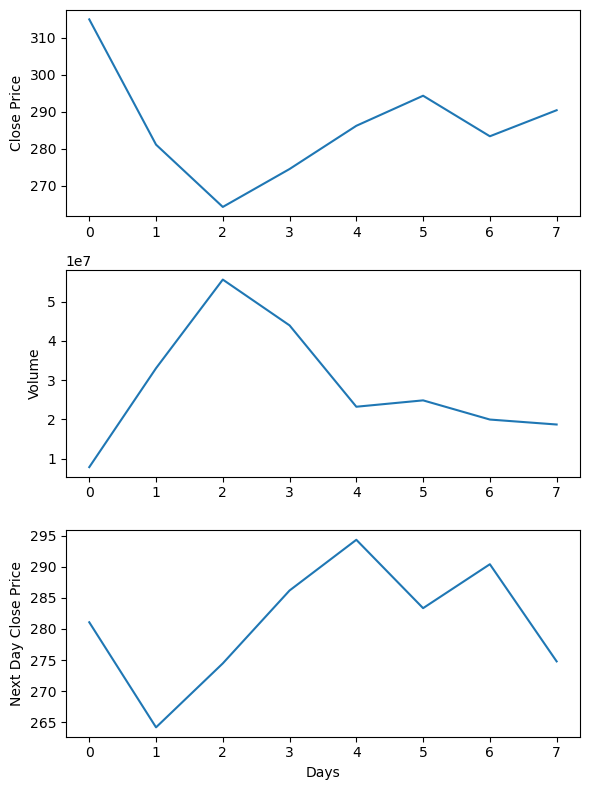

In [106]:
fig, axs = plt.subplots(3, figsize=(6,8))
axs[0].plot(range(8), df['close'][:8])
axs[0].set_ylabel('Close Price')
axs[1].plot(range(8), df['volume'][:8])
axs[1].set_ylabel('Volume')
axs[2].plot(range(8), df['next_day_close'][:8])
axs[2].set_ylabel('Next Day Close Price')
plt.xlabel('Days')
plt.tight_layout()
plt.show()

The RandomForestRegressor, a meta estimator that fits a number of classifying decision trees on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting. 

In [81]:
df['date'] = pd.to_datetime(df['date'])
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day
df['day_of_week'] = df['date'].dt.dayofweek
X = df.drop(['date', 'next_day_close'], axis=1)
y = df['next_day_close']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

This trained model to make predictions on the test data, and then evaluate the performance of the model by calculating the mean absolute error (a measure of prediction error which is the average over the test sample of the absolute differences between prediction and actual observation).

In [82]:
y_pred = rf.predict(X_test)
mean_absolute_error = metrics.mean_absolute_error(y_test, y_pred)
mean_absolute_error

410.3274067925639

Use machine learning histogram to predicted next day closing prices for the first 100 entries in the test data

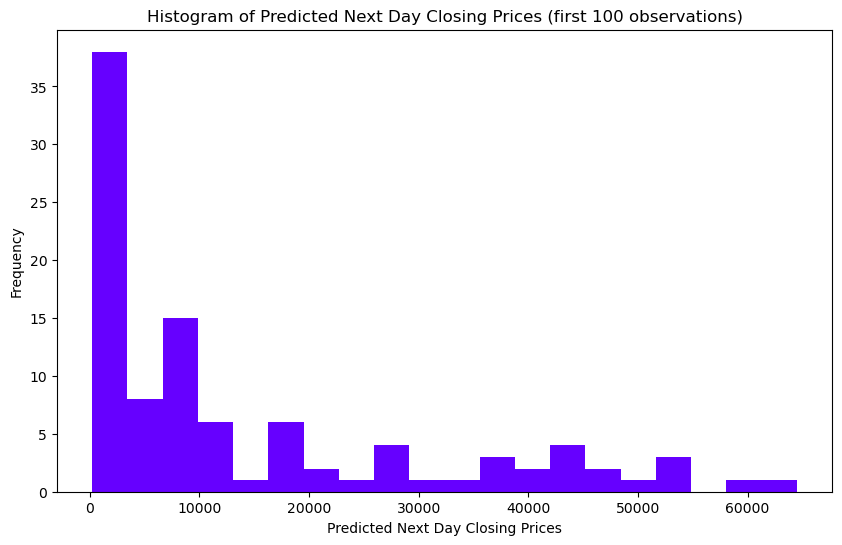

In [83]:
plt.figure(figsize=(10,6))
plt.hist(y_pred[:100], bins=20, color='#6600FF')
plt.title('Histogram of Predicted Next Day Closing Prices (first 100 observations)')
plt.xlabel('Predicted Next Day Closing Prices')
plt.ylabel('Frequency')
plt.show()

Scaling our feature data.

In [84]:
df = pd.read_csv('btc_2015_2024.csv')
features_to_fill = ['rsi_7', 'rsi_14', 'cci_7', 'cci_14', 'next_day_close']
df[features_to_fill] = df[features_to_fill].fillna(df[features_to_fill].mean())
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(df[features_to_fill])
train_size = int(len(scaled_data) * 0.8)
test_size = len(scaled_data) - train_size
train, test = scaled_data[0:train_size, :], scaled_data[train_size:len(df), :]
X_train, y_train = train[:, :-1], train[:, -1]
X_test, y_test = test[:, :-1], test[:, -1]
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1]))
X_train.shape

(2684, 4)

Our input data (`X_train`) for training has 2684 rows and 4 features.

The model using the Adam optimizer and the Mean Squared Error (MSE) loss function

In [85]:
model = Sequential()
model.add(Dense(units=50, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dropout(0.2))
model.add(Dense(units=50, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')
model.summary()

C:\Users\goool\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 50)             │           250 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 50)             │         2,550 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,851 (11.14 KB)

 Trainable params: 2,851 (11.14 KB)

 Non-trainable params: 0 (0.00 B)

Train the model using our training dataset

In [86]:
# Train the model
history = model.fit(X_train, y_train, batch_size=32, epochs=50, verbose=1)

Epoch 1/50
84/84 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - loss: 0.0746
Epoch 2/50
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0628
Epoch 3/50
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0600
Epoch 4/50
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0602
Epoch 5/50
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0628
Epoch 6/50
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0610
Epoch 7/50
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0602
Epoch 8/50
84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0645
Epoch 9/50
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0616
Epoch 10/50
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0577
Epoch 11/50
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0606
Epoch 12/50
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0578
Epoch 13/50
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0589
Epoch 14/50
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0584
Epoch 15/50
84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0596
Epoch 16/50
84/84 ━

Calculate the Mean Squared Error (MSE) for our predictions

In [90]:
from sklearn.metrics import mean_squared_error

# Create a new scaler for 'next_day_close' column
scaler_y = MinMaxScaler(feature_range=(0,1))
y_scaled = scaler_y.fit_transform(df['next_day_close'].values.reshape(-1,1))

# Now the same scaling applied only to 'next_day_close' column values
# Splitting it into training and testing parts
y_train_scaled, y_test_scaled = y_scaled[0:train_size], y_scaled[train_size:len(df)]

# Inverse scaling on the predicted and actual y values
y_pred_actual = scaler_y.inverse_transform(y_pred.reshape(-1,1))
y_test_actual = scaler_y.inverse_transform(y_test_scaled)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test_actual, y_pred_actual)

mse


2.3735709560922947e+18

Visualize our model's predictions against the actual values using a line plot

In [ ]:
import matplotlib.pyplot as plt

# Assuming y_test_actual and y_pred_actual are defined and contain the actual and predicted Bitcoin closing prices
plt.figure(figsize=(9,6))
plt.plot(y_test_actual, color='blue', label='Actual Bitcoin Closing Price')
plt.plot(y_pred_actual, color='red', label='Predicted Bitcoin Closing Price')
plt.title('Bitcoin Prices Prediction')
plt.xlabel('Time')
plt.ylabel('Bitcoin Price')
plt.legend()
plt.show()


In [ ]:
import matplotlib.pyplot as plt

# Assuming y_test_actual and y_pred_actual are defined and contain the actual and predicted Bitcoin closing prices
plt.figure(figsize=(10,6))
plt.plot(y_test_actual, color='blue', label='Actual Bitcoin Closing Price')
plt.plot(y_pred_actual, color='red', label='Predicted Bitcoin Closing Price')
plt.title('Bitcoin Prices Prediction')
plt.xlabel('Time')
plt.ylabel('Bitcoin Price')
plt.legend()
plt.show()